<a href="https://colab.research.google.com/github/2303A51272/ADM-Lab/blob/main/ADM_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
np.random.seed(42)
data=np.random.normal(0,1,100)
outliers=np.random.uniform(5,10,5)

In [ ]:
combined_data = np.concatenate((data, outliers))
print(combined_data)

[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01  1.52302986e+00
 -2.34153375e-01 -2.34136957e-01  1.57921282e+00  7.67434729e-01
 -4.69474386e-01  5.42560044e-01 -4.63417693e-01 -4.65729754e-01
  2.41962272e-01 -1.91328024e+00 -1.72491783e+00 -5.62287529e-01
 -1.01283112e+00  3.14247333e-01 -9.08024076e-01 -1.41230370e+00
  1.46564877e+00 -2.25776300e-01  6.75282047e-02 -1.42474819e+00
 -5.44382725e-01  1.10922590e-01 -1.15099358e+00  3.75698018e-01
 -6.00638690e-01 -2.91693750e-01 -6.01706612e-01  1.85227818e+00
 -1.34972247e-02 -1.05771093e+00  8.22544912e-01 -1.22084365e+00
  2.08863595e-01 -1.95967012e+00 -1.32818605e+00  1.96861236e-01
  7.38466580e-01  1.71368281e-01 -1.15648282e-01 -3.01103696e-01
 -1.47852199e+00 -7.19844208e-01 -4.60638771e-01  1.05712223e+00
  3.43618290e-01 -1.76304016e+00  3.24083969e-01 -3.85082280e-01
 -6.76922000e-01  6.11676289e-01  1.03099952e+00  9.31280119e-01
 -8.39217523e-01 -3.09212376e-01  3.31263431e-01  9.75545127e-01
 -4.79174238e-01 -1.85658

In [ ]:
max_value = np.max(combined_data)
min_value = np.min(combined_data)
print(f"Maximum value: {max_value}")
print(f"Minimum value: {min_value}")

Maximum value: 9.714548519562596
Minimum value: -2.6197451040897444


In [ ]:
df = pd.DataFrame({'value': combined_data}) # Replace data_with_outliers with combined_data
Q1=df['value'].quantile(0.25)
Q3=df['value'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers=df[(df['value']<lower_bound)|(df['value']>upper_bound)]
print(lower_bound)
print(upper_bound)
print(outliers)

-2.3232332563637335
2.372622015963629
        value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549


In [ ]:
z_scores=stats.zscore(df['value'])
outliers_zscore=df[np.abs(z_scores)>3]

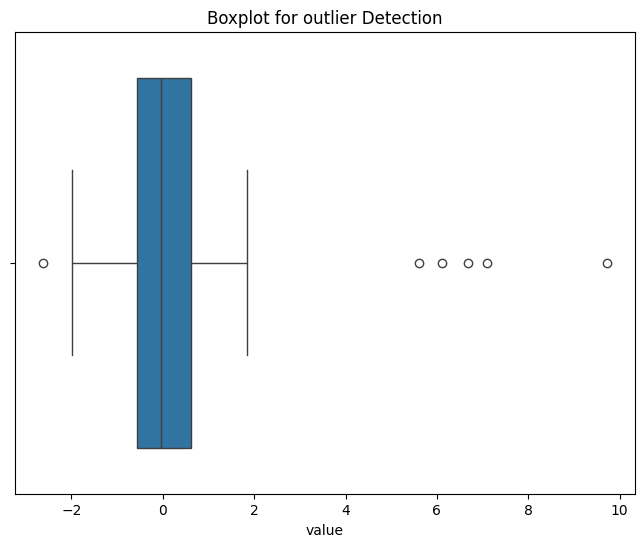

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['value'])
plt.title("Boxplot for outlier Detection")
plt.show()

In [ ]:
df_capped=df.copy()
df_capped['value']=np.clip(df_capped['value'],lower_bound,upper_bound)
print(df_capped)

        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100  2.372622
101  2.372622
102  2.372622
103  2.372622
104  2.372622

[105 rows x 1 columns]


In [ ]:
df_removed=df.copy()
df_removed=df_removed[(df_removed)['value']>=lower_bound]
df_removed=df_removed[(df_removed)['value']<=upper_bound]
print(df_removed)

       value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [ ]:
df_imputed=df.copy()
median_value=df_imputed['value'].median()
df_imputed['value']=np.where(df_imputed['value']<lower_bound,median_value,df_imputed['value'])
df_imputed['value']=np.where(df_imputed['value']>upper_bound,median_value,df_imputed['value'])
print(df_imputed)


        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
100 -0.035826
101 -0.035826
102 -0.035826
103 -0.035826
104 -0.035826

[105 rows x 1 columns]


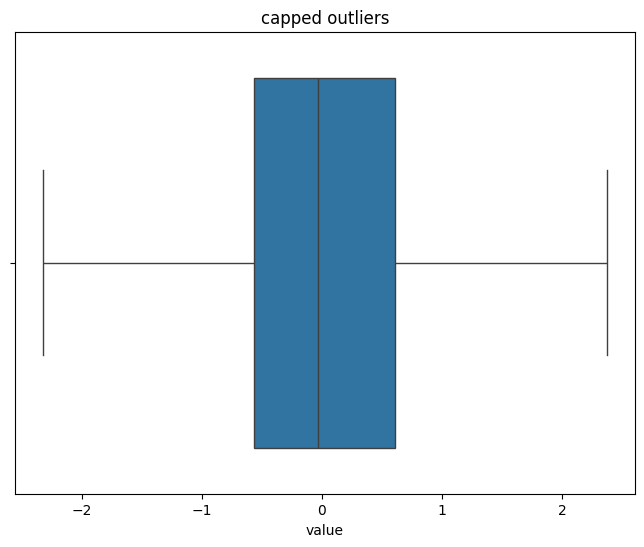

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_capped['value'])
plt.title("capped outliers")
plt.show()